In [ ]:
import matplotlib.pyplot as plot
from google.colab import files
upload=files.upload()

Saving preprocessingTrial (1).csv to preprocessingTrial (1) (3).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("preprocessingTrial (1) (3).csv")

<ipython-input-65-696aa41bd813>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("preprocessingTrial (1) (3).csv")


<ipython-input-76-035f7fc0b79b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

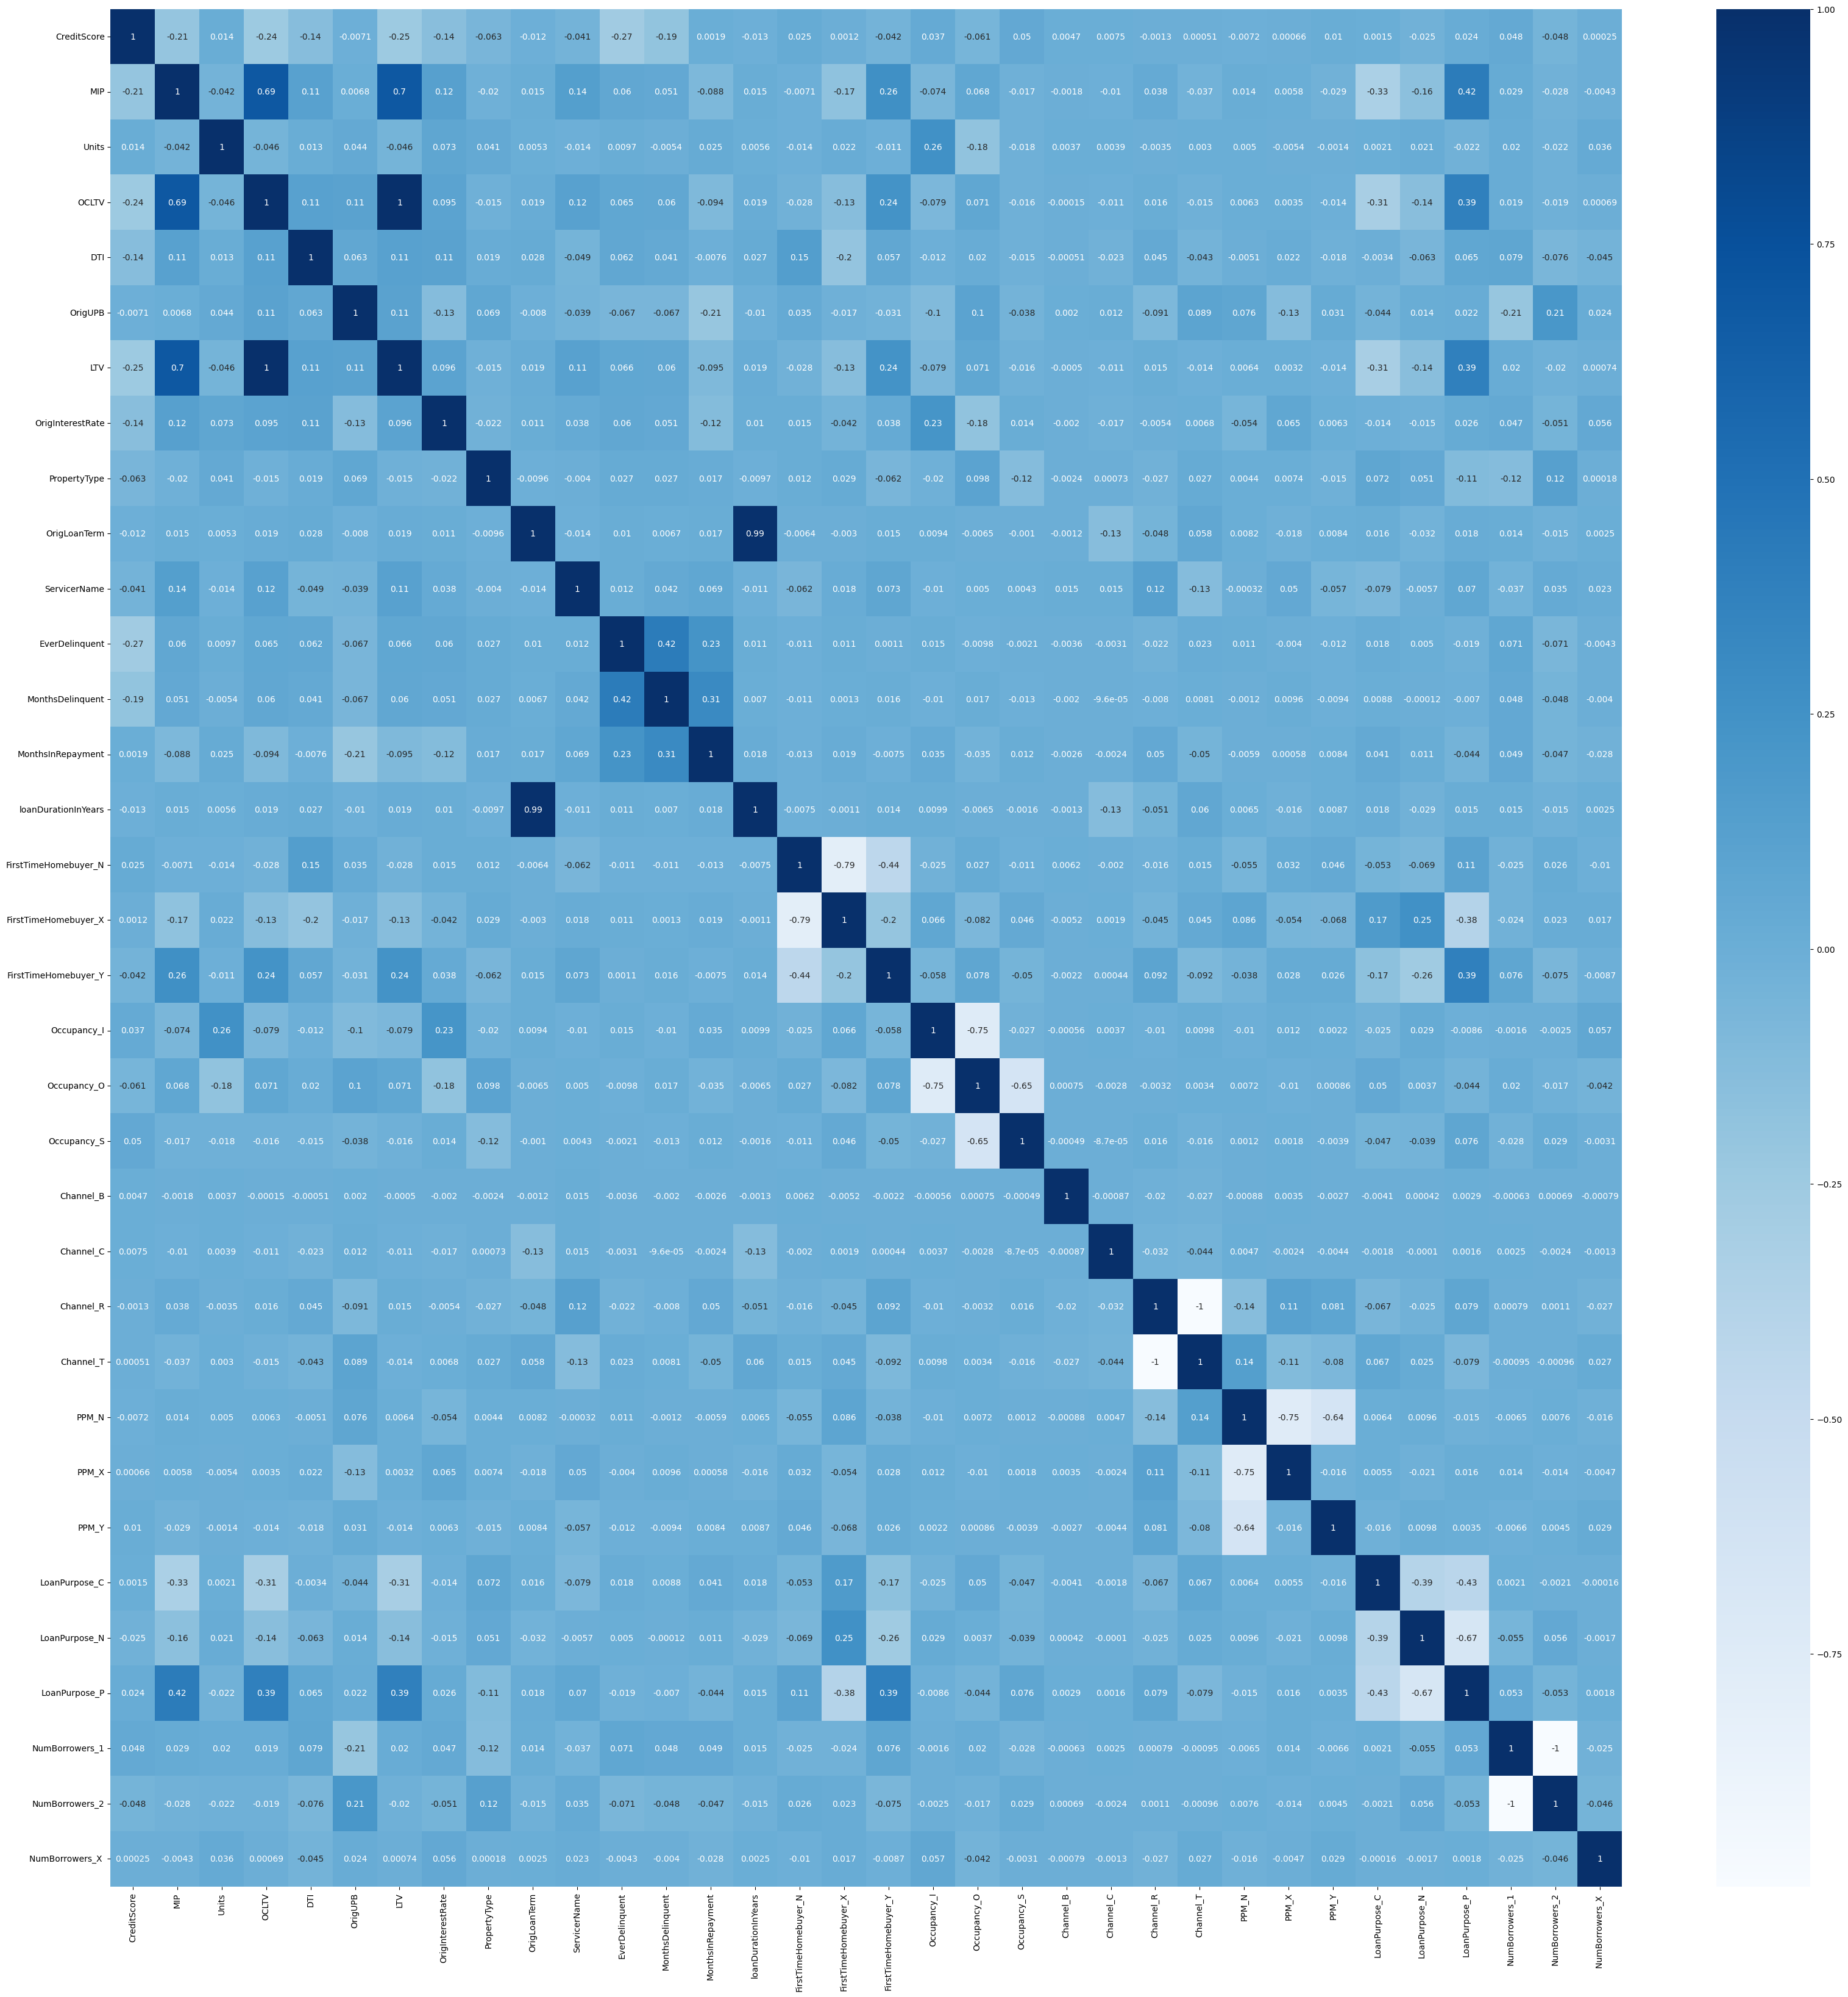

In [ ]:
plot.figure(figsize=(40,40))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
df.fillna(method ='bfill')

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PropertyType,PostalCode,...,Channel_T,PPM_N,PPM_X,PPM_Y,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,NumBorrowers_1,NumBorrowers_2,NumBorrowers_X
0,335.0,0.0,1.0,71.0,21.0,116000.0,71.0,6.875,5.0,48300.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,342.0,0.0,1.0,79.0,28.0,96000.0,79.0,6.875,4.0,30000.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,363.0,0.0,1.0,66.0,18.0,101000.0,66.0,6.750,5.0,35100.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,366.0,0.0,1.0,65.0,25.0,66000.0,65.0,6.625,5.0,48400.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,370.0,0.0,1.0,80.0,38.0,234000.0,80.0,6.750,5.0,95100.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290257,839.0,0.0,1.0,60.0,32.0,90000.0,60.0,7.000,5.0,19400.0000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
290258,840.0,0.0,1.0,73.0,0.0,267000.0,73.0,6.375,5.0,11600.0000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
290259,840.0,0.0,1.0,73.0,31.0,87000.0,73.0,5.625,5.0,92800.0000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
290260,845.0,0.0,1.0,80.0,54.0,88000.0,80.0,7.000,5.0,19300.0000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create an instance of the StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:

y_pred = classifier.predict(X_test)


In [ ]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


<ipython-input-89-ab73bb8c72c7>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


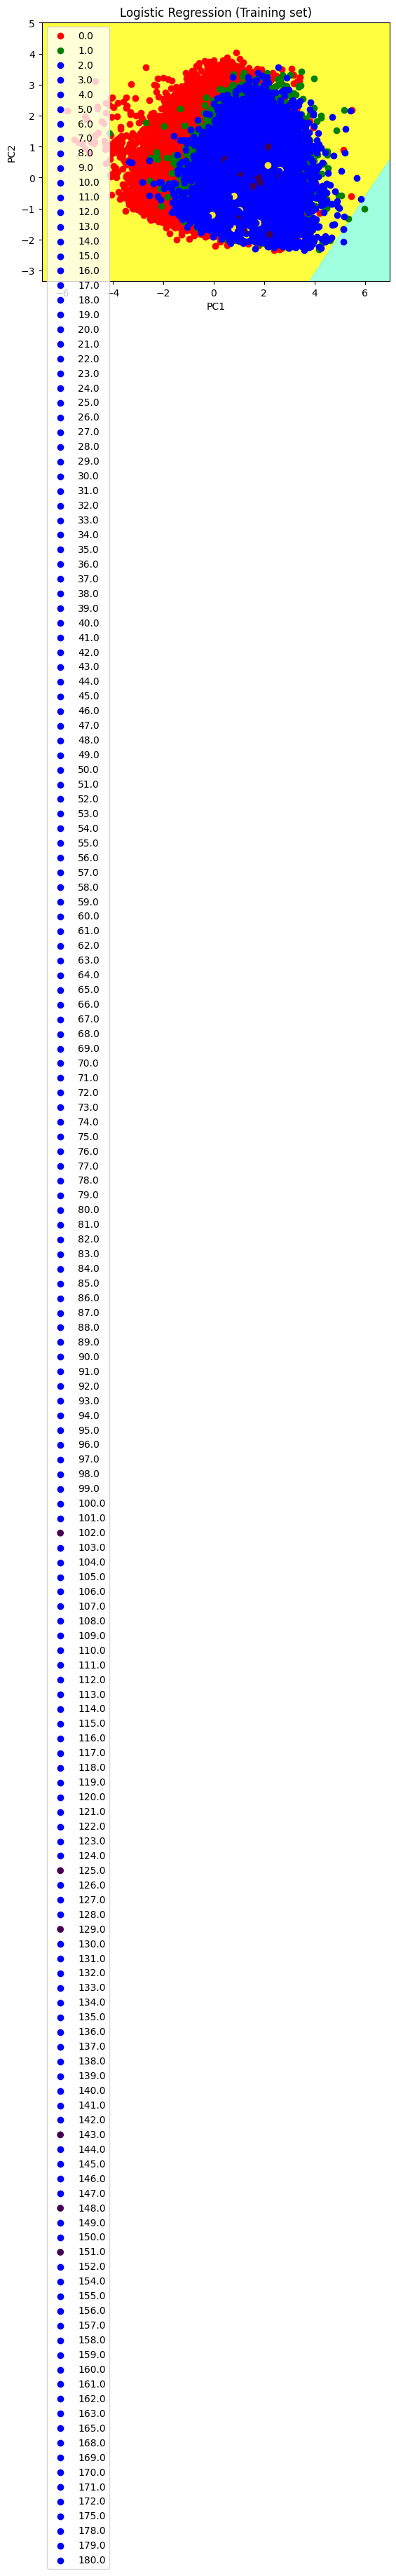

In [ ]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plot.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plot.xlim(X1.min(), X1.max())
plot.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plot.title('Logistic Regression (Training set)')
plot.xlabel('PC1') # for Xlabel
plot.ylabel('PC2') # for Ylabel
plot.legend() # to show legend

# show scatter plot
plot.show()


<ipython-input-91-52d4aefceaa3>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


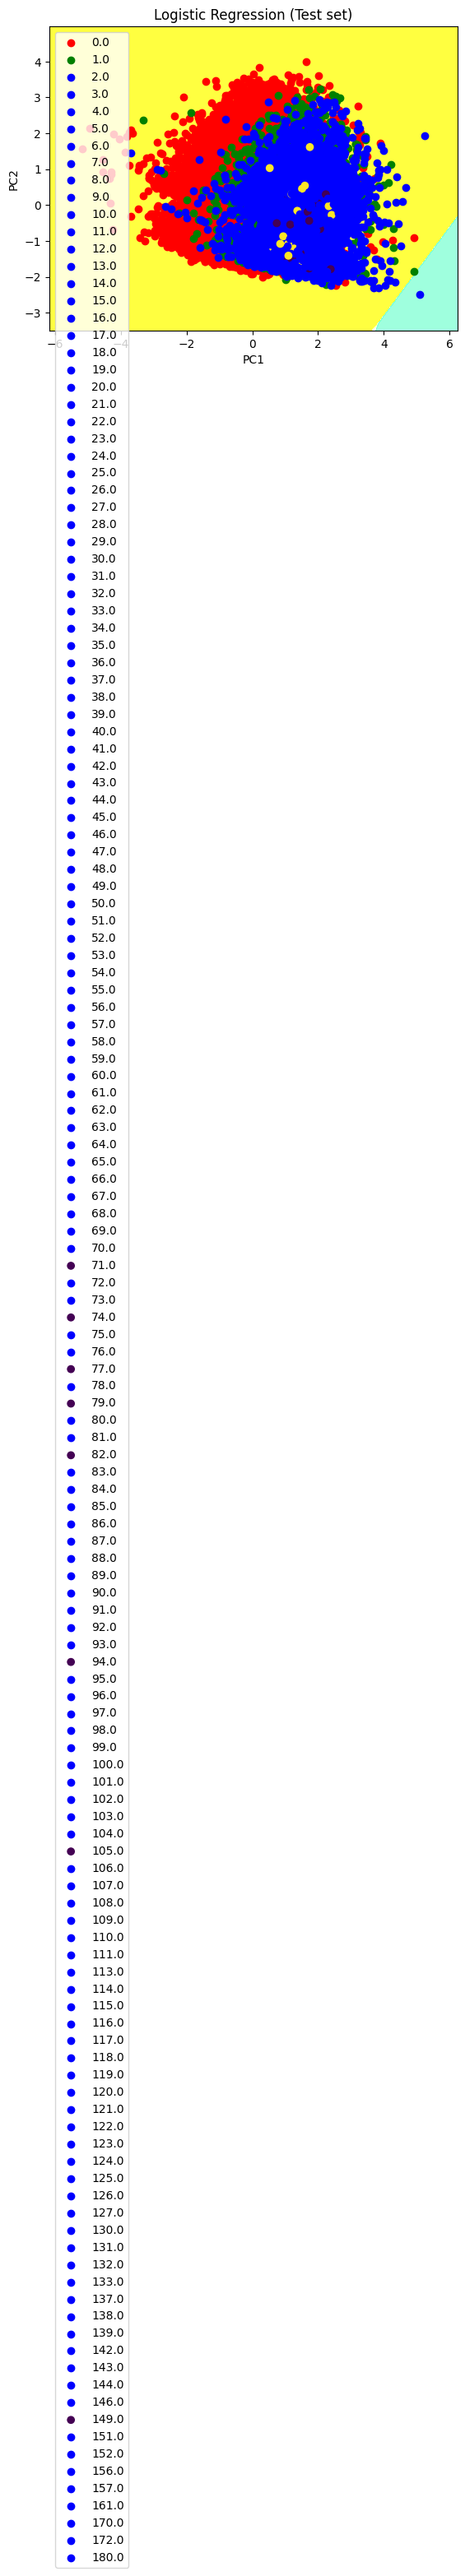

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plot.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plot.xlim(X1.min(), X1.max())
plot.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plot.title('Logistic Regression (Test set)')
plot.xlabel('PC1') # for Xlabel
plot.ylabel('PC2') # for Ylabel
plot.legend()

# show scatter plot
plot.show()
